<a href="https://colab.research.google.com/github/kacruzv011/Mineria-de-datos/blob/main/Copia_de_Comparaciones_Fortran_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteraciones hasta convergencia: 2369
Tiempo total de ejecución: 29.0165 segundos
Tiempo de resolución numérica: 29.0106 segundos
Error relativo máximo: 8.0517e-02
RMSE: 5.8804e-02


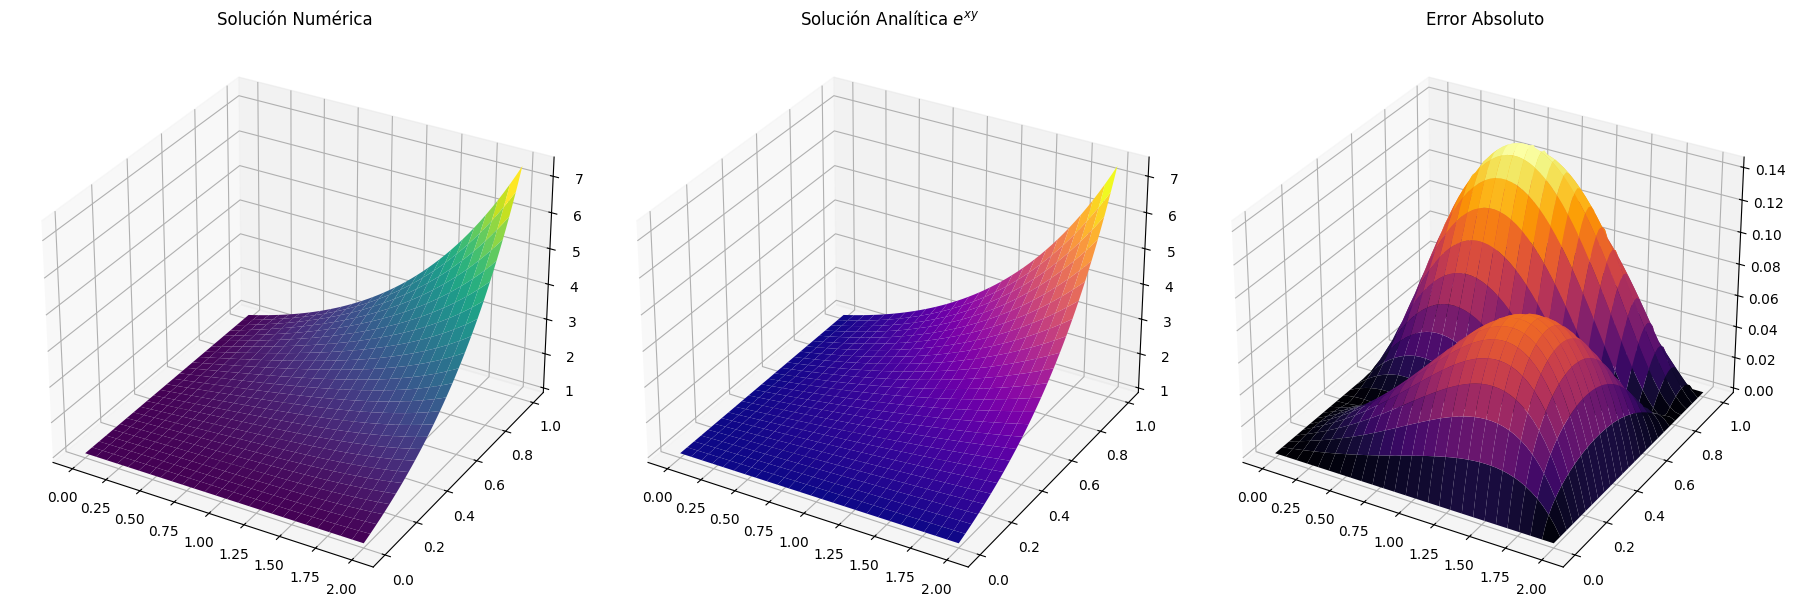

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

def initialize_grid(M, N, x0=0.0, xf=2.0, y0=0.0, yf=1.0):
    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)
    h = (xf - x0) / M
    k = (yf - y0) / N

    V = np.zeros_like(X)
    V_new = np.zeros_like(X)
    source = np.zeros_like(X)

    # Condiciones de contorno
    V[:, 0] = 1                 # V(x, 0) = 1
    V[0, :] = 1                 # V(0, y) = 1
    V[:, -1] = np.exp(x)       # V(x, 1) = e^x
    V[-1, :] = np.exp(2 * y)   # V(2, y) = e^{2y}

    return X, Y, V, V_new, source, h, k

def fuente(X, Y):
    return (X**2 + Y**2) * np.exp(X * Y)

def solve_poisson(V, source, M, N, h, k, tol=1e-6):
    delta = 1.0
    iterations = 0
    while delta > tol:
        S1 = []
        for i in range(1, M):
            for j in range(1, N):
                V_new = (
                    ((V[i + 1, j] + V[i - 1, j]) * k**2) +
                    ((V[i, j + 1] + V[i, j - 1]) * h**2) -
                    (source[i, j] * h**2 * k**2)
                ) / (2 * (h**2 + k**2))

                S1.append(abs(V_new - V[i, j]))
                V[i, j] = V_new

        delta = max(S1)
        iterations += 1

    print(f"Iteraciones hasta convergencia: {iterations}")
    return V

def plot_comparison(X, Y, V_num, V_exact):
    fig = plt.figure(figsize=(18, 6))

    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, Y, V_num, cmap='viridis')
    ax1.set_title('Solución Numérica')

    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, Y, V_exact, cmap='plasma')
    ax2.set_title('Solución Analítica $e^{xy}$')

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X, Y, np.abs(V_exact - V_num), cmap='inferno')
    ax3.set_title('Error Absoluto')

    plt.tight_layout()
    plt.show()

# ========= EJECUCIÓN =========// Simulación de la ecuación de Poisson en 2D utilizando diferencias finitas
// Usa condiciones de frontera de Dirichlet y un término fuente con forma gaussiana

#include <iostream>
#include <vector>
#include <cmath>
#include <algorithm>
#include <fstream>

const double x0 = 0.0, xf = 1.0;
const double y_ini = 0.0, yf = 1.0;
const double e = 8.85e-12; // Permitividad eléctrica
const double TOL = 1e-6;

// Inicializa las matrices de la grilla y las condiciones de frontera#include <iostream>
#include <vector>
#include <fstream>
#include <cmath>

const double x_ini = 0.0, x_fin = 2.0;
const double y_ini = 0.0, y_fin = 1.0;

// Función fuente f(x, y)
double f(double x, double y) {
    return (x*x + y*y) * std::exp(x * y);
}


// Condiciones de frontera: aquí u(x, y) = 0 en el borde
double boundary_condition(double x, double y) {
    return 0.0;
}

// Inicializar la malla
void initialize_grid(int M, int N, std::vector<std::vector<double>> &u, std::vector<std::vector<double>> &rho, double &h, double &k) {
    h = (x_fin - x_ini) / M;
    k = (y_fin - y_ini) / N;

    u.resize(M + 1, std::vector<double>(N + 1, 0.0));
    rho.resize(M + 1, std::vector<double>(N + 1, 0.0));

    for (int i = 0; i <= M; ++i) {
        double x = x_ini + i * h;
        for (int j = 0; j <= N; ++j) {
            double y = y_ini + j * k;

            // Condiciones de frontera
            if (i == 0 || i == M || j == 0 || j == N) {
                u[i][j] = boundary_condition(x, y);
            }

            // Fuente
            rho[i][j] = f(x, y);
        }
    }
}

// Método iterativo de relajación de Jacobi
void solve_poisson_jacobi(std::vector<std::vector<double>> &u, const std::vector<std::vector<double>> &rho, double h, double k, int max_iter, double tol) {
    int M = u.size() - 1;
    int N = u[0].size() - 1;

    std::vector<std::vector<double>> u_new = u;

    double h2 = h * h;
    double k2 = k * k;
    double denom = 2 * (1.0 / h2 + 1.0 / k2);

    for (int iter = 0; iter < max_iter; ++iter) {
        double max_error = 0.0;

        for (int i = 1; i < M; ++i) {
            for (int j = 1; j < N; ++j) {
                u_new[i][j] = ((u[i+1][j] + u[i-1][j]) / h2 +
                               (u[i][j+1] + u[i][j-1]) / k2 +
                               rho[i][j]) / denom;

                max_error = std::max(max_error, std::abs(u_new[i][j] - u[i][j]));
            }
        }

        u = u_new;

        if (max_error < tol) {
            std::cout << "Convergió en " << iter << " iteraciones con error máximo " << max_error << "\n";
            return;
        }
    }

    std::cout << "No convergió en " << max_iter << " iteraciones\n";
}

// Exportar la solución a un archivo para graficar
void export_to_file(const std::vector<std::vector<double>> &u, double h, double k, int M, int N, const std::string &filename) {
    std::ofstream file(filename);
    for (int i = 0; i <= M; ++i) {
        double x = x_ini + i * h;
        for (int j = 0; j <= N; ++j) {
            double y = y_ini + j * k;
            file << x << " " << y << " " << u[i][j] << "\n";
        }
        file << "\n";
    }
    file.close();
}

int main() {double f(double x, double y) {
    return (x*x + y*y) * std::exp(x * y);
}

    std::vector<std::vector<double>> u, rho;

    initialize_grid(M, N, u, rho, h, k);
    solve_poisson_jacobi(u, rho, h, k, 10000, 1e-6);
    export_to_file(u, h, k, M, N, "solucion.dat");

    return 0;
}
double>>& source, double& h, double& k) {
    h = (xf - x0) / M;
    k = (yf - y_ini) / N;

    T.resize(M + 1, std::vector<double>(N + 1, 0.0));
    source.resize(M + 1, std::vector<double>(N + 1, 0.0));

    // Condiciones de frontera
    for (int j = 0; j <= N; ++j) {
        T[M][j] = 0.0;
        T[0][j] = 0.0;
    }
    for (int i = 0; i <= M; ++i) {
        T[i][0] = 0.0;
        T[i][N] = std::pow(x0 + i * h, 1.0);
    }
}

// Calcula el término fuente como una distribución gaussiana
void poisson_source(int M, int N, std::vector<std::vector<double>>& source, double h, double k) {
    double mu = 0.5, sigma = 0.1;
    for (int i = 0; i <= M; ++i) {
        for (int j = 0; j <= N; ++j) {
            double x = x0 + i * h;
            double y = y_ini + j * k;
            source[i][j] = std::exp(-((x - mu) * (x - mu) + (y - mu) * (y - mu)) / (2 * sigma * sigma));
        }
    }
}

// Resuelve la ecuación de Poisson iterativamente hasta convergencia
void solve_poisson(std::vector<std::vector<double>>& T, const std::vector<std::vector<double>>& source, int M, int N, double h, double k) {
    double constante = 1.0 / e;
    double delta = 1.0;

    while (delta > TOL) {
        delta = 0.0;
        for (int i = 1; i < M; ++i) {
            for (int j = 1; j < N; ++j) {
                double T_new = (
                    ((T[i + 1][j] + T[i - 1][j]) * k * k) +
                    ((T[i][j + 1] + T[i][j - 1]) * h * h) -
                    (constante * source[i][j] * h * h * k * k)) /
                    (2.0 * (h * h + k * k));

                delta = std::max(delta, std::abs(T_new - T[i][j]));
                T[i][j] = T_new;
            }
        }
    }
}

// Exporta los resultados de la matriz T a un archivo .dat
void export_to_file(const std::vector<std::vector<double>>& T, double h, double k, int M, int N, const std::string& filename) {
    std::ofstream file(filename);
    if (!file.is_open()) {
        std::cerr << "No se pudo abrir el archivo para escritura." << std::endl;
        return;
    }
    for (int i = 0; i <= M; ++i) {
        for (int j = 0; j <= N; ++j) {
            double x = x0 + i * h;
            double y = y_ini + j * k;
            file << x << "\t" << y << "\t" << T[i][j] << "\n";
        }
    }
    file.close();
    std::cout << "Resultados exportados a " << filename << std::endl;
}

int main() {
    int M = 50, N = 50;
    double h, k;
    std::vector<std::vector<double>> T, source;

    initialize_grid(M, N, T, source, h, k);
    poisson_source(M, N, source, h, k);
    solve_poisson(T, source, M, N, h, k);

    export_to_file(T, h, k, M, N, "solucion_poisson.dat");

    std::cout << "Simulación completada." << std::endl;
    return 0;
}

start_time = time.time()

# Parámetros
M, N = 50, 50
X, Y, V, _, _, h, k = initialize_grid(M, N)

# Término fuente
source = fuente(X, Y)

# Resolver
solve_start = time.time()
V_sol = solve_poisson(V, source, M, N, h, k)
solve_end = time.time()

# Solución analítica
V_exact = np.exp(X * Y)

# Errores
error_absoluto = np.abs(V_exact - V_sol)
error_relativo = np.max(error_absoluto / (V_exact + 1e-16))
rmse = np.sqrt(np.mean(error_absoluto**2))

# Tiempos y erroresParis
Singapur
Roma
Berlín
Washington
Buenos Aires
Lima
Tokio
Estocolmo
Bangkok
Madrid
Londres
Montevideo
Pekin
Santo Domingo
end_time = time.time()
print(f"Tiempo total de ejecución: {end_time - start_time:.4f} segundos")
print(f"Tiempo de resolución numérica: {solve_end - solve_start:.4f} segundos")
print(f"Error relativo máximo: {error_relativo:.4e}")
print(f"RMSE: {rmse:.4e}")

# Gráfica
plot_comparison(X, Y, V_sol, V_exact)

Iteraciones hasta convergencia: 1307
Tiempo total de ejecución: 2.5709 segundos
Tiempo de resolución numérica: 2.5686 segundos
Error relativo máximo: 6.0582e-05
RMSE: 6.3755e-06


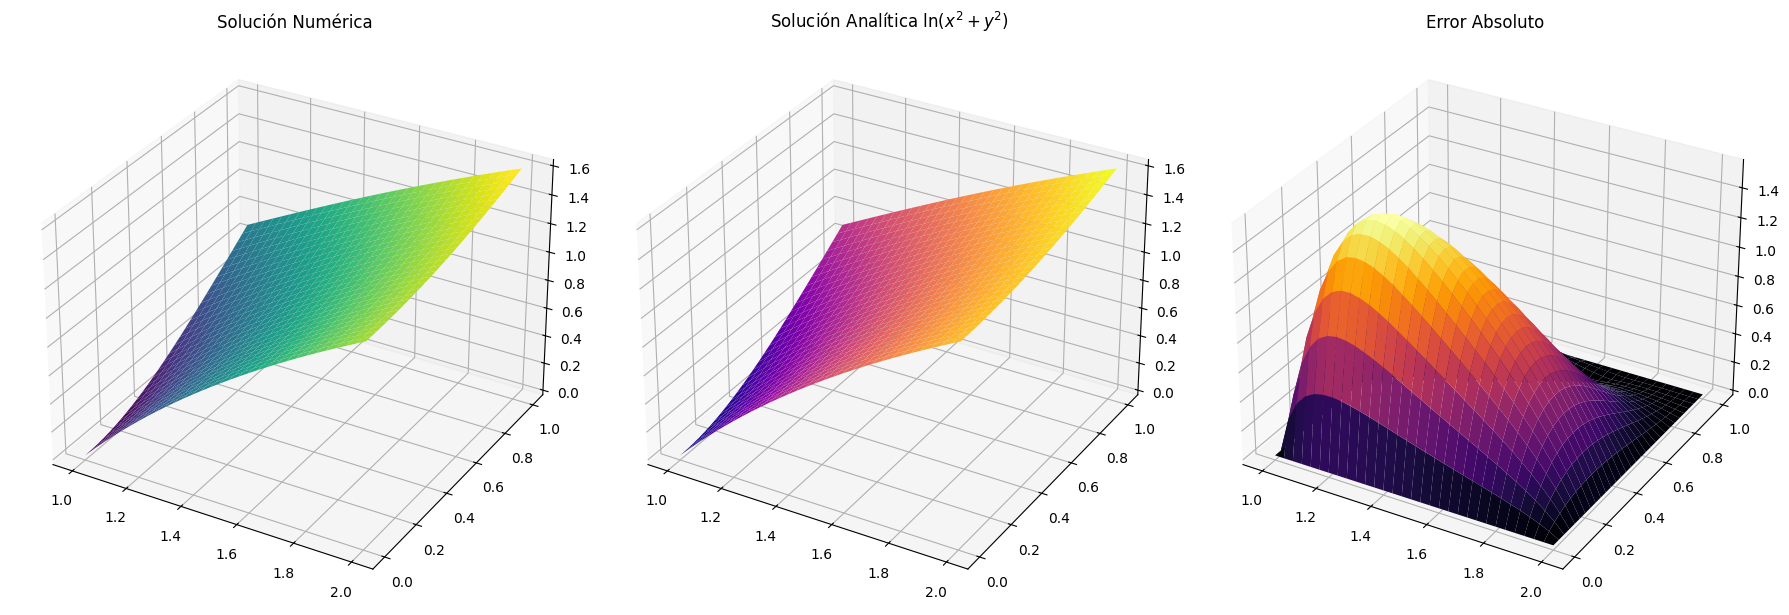

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

def initialize_grid(M, N, x0=1.0, xf=2.0, y0=0.0, yf=1.0):
    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)
    h = (xf - x0) / M
    k = (yf - y0) / N

    V = np.zeros_like(X)
    V_new = np.zeros_like(X)
    source = np.zeros_like(X)  # fuente = 0 para ecuación de Laplace


    V[:, 0]  = np.log(Y[:, 0]**2 + 1)
    V[:, -1] = np.log(Y[:, -1]**2 + 4)
    V[0, :]  = 2 * np.log(X[0, :])
    V[-1, :] = np.log(X[-1, :]**2 + 1)
    return X, Y, V, V_new, source, h, k

def solve_poisson(V, source, M, N, h, k, tol=1e-8):
    delta = 1.0
    iterations = 0
    while delta > tol:
        S1 = []
        for i in range(1, M):
            for j in range(1, N):
                V_new = (
                    ((V[i + 1, j] + V[i - 1, j]) * k**2) +
                    ((V[i, j + 1] + V[i, j - 1]) * h**2) -
                    (source[i, j] * h**2 * k**2)
                ) / (2 * (h**2 + k**2))

                S1.append(abs(V_new - V[i, j]))
                V[i, j] = V_new

        delta = max(S1)
        iterations += 1

    print(f"Iteraciones hasta convergencia: {iterations}")
    return V

def plot_comparison(X, Y, V_num, V_exact):
    fig = plt.figure(figsize=(18, 6))

    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, Y, V_num, cmap='viridis')
    ax1.set_title('Solución Numérica')

    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, Y, V_exact, cmap='plasma')
    ax2.set_title('Solución Analítica $\\ln(x^2 + y^2)$')

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X, Y, np.abs(V_exact - V_num), cmap='inferno')
    ax3.set_title('Error Absoluto')

    plt.tight_layout()
    plt.show()

# ========= EJECUCIÓN =========
start_time = time.time()

# Parámetros
M, N = 30, 30
X, Y, V, _, _, h, k = initialize_grid(M, N)

# Término fuente (cero para Laplace)
source = np.zeros_like(X)

# Resolver
solve_start = time.time()
V_sol = solve_poisson(V, source, M, N, h, k)
solve_end = time.time()

# Solución analítica
V_exact = np.log(X**2 + Y**2)

# Errores
error_absoluto = np.abs(V_exact - V_sol)
error_relativo = np.max(error_absoluto / (np.abs(V_exact) + 1e-16))

rmse = np.sqrt(np.mean(error_absoluto**2))

# Tiempos y errores
end_time = time.time()
print(f"Tiempo total de ejecución: {end_time - start_time:.4f} segundos")
print(f"Tiempo de resolución numérica: {solve_end - solve_start:.4f} segundos")
print(f"Error relativo máximo: {error_relativo:.4e}")
print(f"RMSE: {rmse:.4e}")

# Gráfica
plot_comparison(X, Y, V_sol, V_exact)


Iteraciones hasta convergencia: 46
Tiempo total de ejecución: 0.0049 segundos
Tiempo de resolución numérica: 0.0038 segundos
Error relativo máximo: 2.8854e+00
RMSE: 1.8008e+00


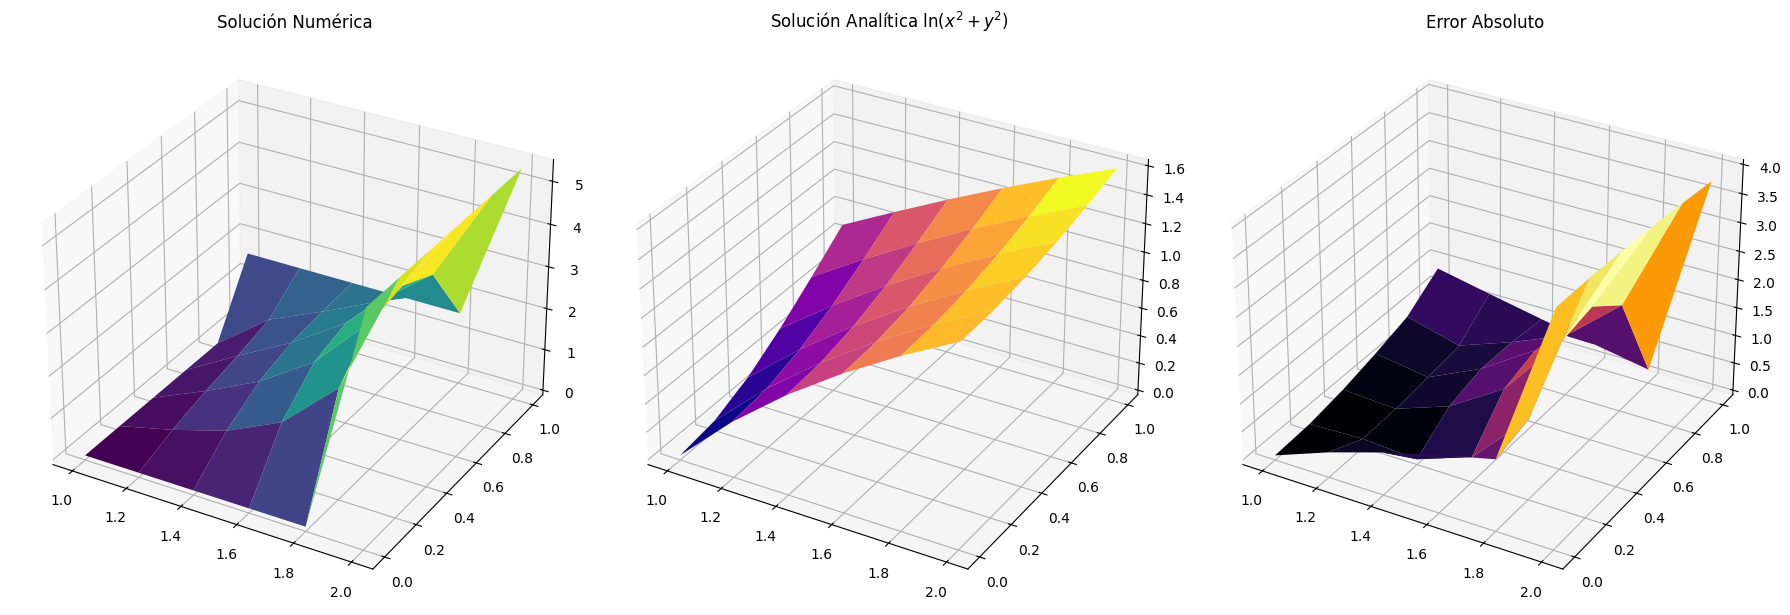

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

def initialize_grid(M, N, x0=1.0, xf=2.0, y0=0.0, yf=1.0):
    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)
    h = (xf - x0) / M
    k = (yf - y0) / N

    V = np.zeros_like(X)
    V_new = np.zeros_like(X)
    source = 0.000001 * np.ones_like(X)  # Fuente = 0.000001 para ecuación de Laplace

    # Condiciones de frontera
    V[0, :]  = np.log(Y[0, :]**2 + 1)        # x = 1
    V[:, 0]  = 2 * np.log(X[:, 0])           # y = 0
    V[-1, :] = np.log(Y[-1, :]**2 + 4)       # x = 2
    V[:, -1] = np.log(X[:, -1]**2) + 4

    return X, Y, V, V_new, source, h, k

def solve_poisson(V, source, M, N, h, k, tol=1e-8):
    delta = 1.0
    iterations = 0
    while delta > tol:
        S1 = []
        for i in range(1, M):
            for j in range(1, N):
                V_new = (
                    ((V[i + 1, j] + V[i - 1, j]) * k**2) +
                    ((V[i, j + 1] + V[i, j - 1]) * h**2) -
                    (source[i, j] * h**2 * k**2)
                ) / (2 * (h**2 + k**2))

                S1.append(abs(V_new - V[i, j]))
                V[i, j] = V_new

        delta = max(S1)
        iterations += 1

    print(f"Iteraciones hasta convergencia: {iterations}")
    return V

def plot_comparison(X, Y, V_num, V_exact):
    fig = plt.figure(figsize=(18, 6))

    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, Y, V_num, cmap='viridis')
    ax1.set_title('Solución Numérica')

    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, Y, V_exact, cmap='plasma')
    ax2.set_title('Solución Analítica $\\ln(x^2 + y^2)$')

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X, Y, np.abs(V_exact - V_num), cmap='inferno')
    ax3.set_title('Error Absoluto')

    plt.tight_layout()
    plt.show()

# ========= EJECUCIÓN =========
start_time = time.time()

# Parámetros
M, N = 5, 5
X, Y, V, _, _, h, k = initialize_grid(M, N)

# Término fuente (cero para Laplace)
source = 0.000001 * np.ones_like(X)  # Fuente = 0.000001 para ecuación de Laplace

# Resolver
solve_start = time.time()
V_sol = solve_poisson(V, source, M, N, h, k)
solve_end = time.time()

# Solución analítica
V_exact = np.log(X**2 + Y**2)

# Errores
error_absoluto = np.abs(V_exact - V_sol)
error_relativo = np.max(error_absoluto / (V_exact + 1e-16))
rmse = np.sqrt(np.mean(error_absoluto**2))

# Tiempos y errores
end_time = time.time()
print(f"Tiempo total de ejecución: {end_time - start_time:.4f} segundos")
print(f"Tiempo de resolución numérica: {solve_end - solve_start:.4f} segundos")
print(f"Error relativo máximo: {error_relativo:.4e}")
print(f"RMSE: {rmse:.4e}")

# Gráfica
plot_comparison(X, Y, V_sol, V_exact)


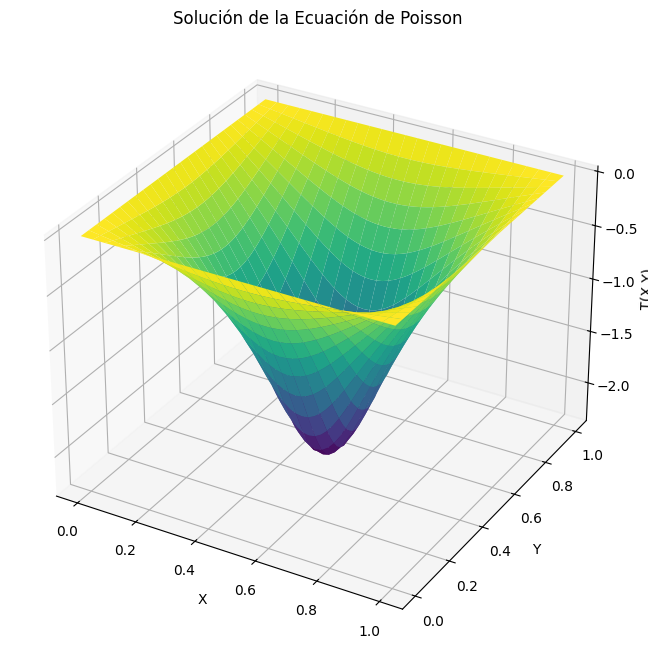

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
2m3,462s
def initialize_grid(M, N):
    """
    Inicializa la grilla y las matrices T, T_new y source para el proceso de iteración.

    Parámetros:
    - M (int): Número de pasos en el eje x.
    - N (int): Número de pasos en el eje y.

    Retorna:
    - X (ndarray): Matriz de coordenadas x de la grilla.
    - Y (ndarray): Matriz de coordenadas y de la grilla.
    - T (ndarray): Matriz inicializada con condiciones de contorno.
    - T_new (ndarray): Matriz para almacenar valores actualizados durante la iteración.
    - source (ndarray): Término fuente inicializado en ceros.
    """
    # Rango del espacio
    x0, xf = 0.0, 1.0
    y0, yf = 0.0, 1.0

    # Tamaño de la grilla
    h = (xf - x0) / M
    k = (yf - y0) / N

    # Creación de la grilla
    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)

    # Inicialización de matrices
    T = np.zeros((len(Y), len(X)))
    T_new = np.zeros((len(Y), len(X)))
    source = np.zeros((len(Y), len(X)))

    # Condiciones de contorno
    T[-1, :] = 0  # Condición de frontera en y = 1
    T[0, :] = 0   # Condición de frontera en y = 0
    T[:, -1] = np.power(X[:, -1], 1)  # Condición de frontera en x = 1
    T[:, 0] = 0   # Condición de frontera en x = 0

    return X, Y, T, T_new, source

def poisson_fuente(X, Y):
    """
    Función que define la forma del término fuente en la ecuación de Poisson.
    En este caso, se asume una distribución Gaussiana.

    Parámetros:
    - X (ndarray): Matriz de coordenadas x de la grilla.2m3,462s
    - Y (ndarray): Matriz de coordenadas y de la grilla.

    Retorna:
    - G (ndarray): Matriz con los valores del término fuente.
    """
    mu, sigma = 0.5, 0.1  # Parámetros de la distribución Gaussiana
    G = np.exp(-((X - mu)**2 + (Y - mu)**2) / (2.0 * sigma**2)) / (np.sqrt(2 * np.pi * sigma))

    # Condiciones de contorno para la fuente
    G[-1, :] = 0
    G[0, :] = 0
    G[:, -1] = 0
    G[:, 0] = 0
    return G

def solve_poisson(T, source, M, N, h, k, tol=1e-6):
    """
    Aproximación de la solución de la ecuación de Poisson utilizando el método de diferencias finitas.

    Parámetros:
    - T (ndarray): Matriz inicial
    - source (ndarray): Término fuente.
    - M (int): Número de pasos en el eje x.
    - N (int): Número de pasos en el eje y.
    - h (float): Tamaño del paso en x.
    - k (float): Tamaño del paso en y.
    - tol (float): Tolerancia para el criterio de convergencia.

    Retorna:
    - T (ndarray): Matriz con la solución aproximada.
    """
    e = 8.85e-12  # Permitividad eléctrica
    constante = 1 / e  # Factor de la ecuación de Poisson
    delta = 1.0

    while delta > tol:
        S1 = []
        # Iteración sobre los puntos internos
        for i in range(1, M):
            for j in range(1, N):
                T_new = (
                    ((T[i + 1, j] + T[i - 1, j]) * k**2) +
                    ((T[i, j + 1] + T[i, j - 1]) * h**2) -
                    (constante * source[i, j] * h**2 * k**2)
                ) / (2 * (h**2 + k**2))

                # Actualizar el valor en T_new y calcular la diferencia
                S1.append(np.abs(T_new - T[i, j]))
                T[i, j] = T_new

        # Verificar tolerancia
        delta = max(S1)

    return T

# Ejemplo de uso
M = N = 50
X, Y, T, _, _ = initialize_grid(M, N)
h = (1.0 - 0.0) / M
k = (1.0 - 0.0) / N

# Definir el término fuente
source = poisson_fuente(X, Y)

# Solucionar la ecuación de Poisson
T_solution = solve_poisson(T, source, M, N, h, k)

# Graficar la solución
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, T_solution, cmap='viridis')
ax.set_title("Solución de la Ecuación de Poisson")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("T(X,Y)")
plt.show()


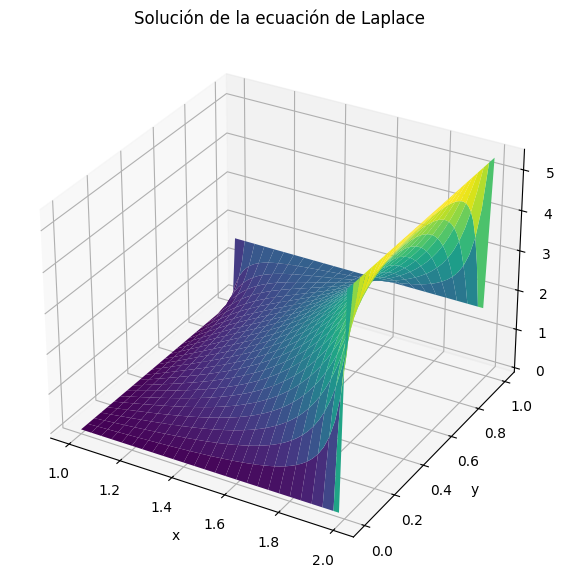

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(M, N):
    """
    Inicializa la grilla y las matrices V para el proceso iterativo.

    Parámetros:
    - M (int): Número de pasos en x.
    - N (int): Número de pasos en y.

    Retorna:
    - X, Y (ndarray): Coordenadas de la grilla.
    - V (ndarray): Matriz con condiciones de frontera.
    - h, k (float): Tamaños de paso en x e y.
    """
    x0, xf = 1.0, 2.0
    y0, yf = 0.0, 1.0

    h = (xf - x0) / M
    k = (yf - y0) / N

    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)

    V = np.zeros((N + 1, M + 1))

    # Condiciones de frontera
    V[0, :]  = np.log(Y[0, :]**2 + 1)            # x = 1 (parte inferior)
    V[:, 0]  = 2 * np.log(X[:, 0])               # y = 0 (lado izquierdo)
    V[-1, :] = np.log(Y[-1, :]**2 + 4)           # x = 2 (parte superior)
    V[:, -1] = np.log(X[:, -1]**2) + 4           # y = 1 (lado derecho)

    return X, Y, V, h, k

def solve_laplace(V, M, N, h, k, tol=1e-6):
    """
    Soluciona la ecuación de Laplace ∇²V = 0 usando diferencias finitas.

    Parámetros:
    - V (ndarray): Matriz con condiciones de frontera.
    - M, N (int): Número de pasos en x e y.
    - h, k (float): Tamaños de paso en x e y.
    - tol (float): Tolerancia para convergencia.

    Retorna:
    - V (ndarray): Solución aproximada.
    """
    delta = 1.0
    while delta > tol:
        V_old = V.copy()
        for i in range(1, N):
            for j in range(1, M):
                V[i, j] = (
                    (V_old[i + 1, j] + V_old[i - 1, j]) * k**2 +
                    (V_old[i, j + 1] + V_old[i, j - 1]) * h**2
                ) / (2 * (h**2 + k**2))
        delta = np.max(np.abs(V - V_old))
    return V

# Parámetros de la grilla
M = N = 50
X, Y, V, h, k = initialize_grid(M, N)

# Resolver Laplace
V_solution = solve_laplace(V, M, N, h, k)

# Visualizar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V_solution, cmap='viridis')
ax.set_title('Solución de la ecuación de Laplace')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x, y)')
plt.show()


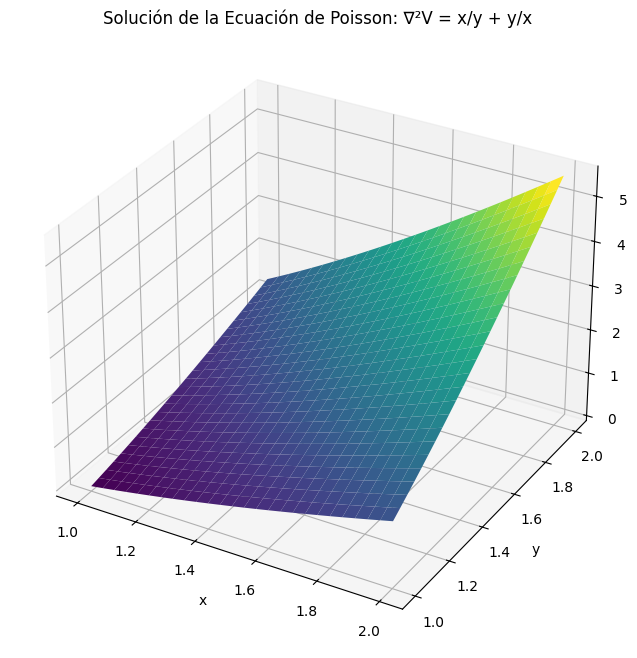

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(M, N):
    """
    Inicializa la grilla y la matriz de potencial con condiciones de frontera para la ecuación de Poisson.
    """
    # Rango del dominio
    x0, xf = 1.0, 2.0
    y0, yf = 1.0, 2.0

    h = (xf - x0) / M
    k = (yf - y0) / N

    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)

    V = np.zeros_like(X)

    # Condiciones de frontera
    V[0, :]  = y * np.log(y)           # V(1, y)
    V[:, 0]  = x * np.log(x)           # V(x, 1)
    V[-1, :] = 2 * y * np.log(2 * y)   # V(2, y)
    V[:, -1] = x * np.log(4 * x**2)    # V(x, 2)

    return X, Y, V, h, k

def source_term(X, Y):
    """
    Término fuente f(x, y) = x/y + y/x.
    """
    f = X / Y + Y / X
    # Asegurarse que no se sobreescriban las condiciones de frontera
    f[0, :] = 0
    f[-1, :] = 0
    f[:, 0] = 0
    f[:, -1] = 0
    return f

def solve_poisson(V, source, M, N, h, k, tol=1e-6):
    """
    Soluciona la ecuación de Poisson ∇²V = f(x, y) con condiciones de frontera dadas.
    """
    delta = 1.0
    while delta > tol:
        V_old = V.copy()
        for i in range(1, M):
            for j in range(1, N):
                V[i, j] = (
                    (V_old[i+1, j] + V_old[i-1, j]) * k**2 +
                    (V_old[i, j+1] + V_old[i, j-1]) * h**2 -
                    source[i, j] * h**2 * k**2
                ) / (2 * (h**2 + k**2))
        delta = np.max(np.abs(V - V_old))
    return V

# Parámetros de la grilla
M = N = 50
X, Y, V, h, k = initialize_grid(M, N)
source = source_term(X, Y)

# Resolver
V_solution = solve_poisson(V, source, M, N, h, k)

# Visualizar
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V_solution, cmap='viridis')
ax.set_title("Solución de la Ecuación de Poisson: ∇²V = x/y + y/x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("V(x,y)")
plt.show()


Tiempo de cálculo: 23.4359 segundos. Iteraciones: 4404


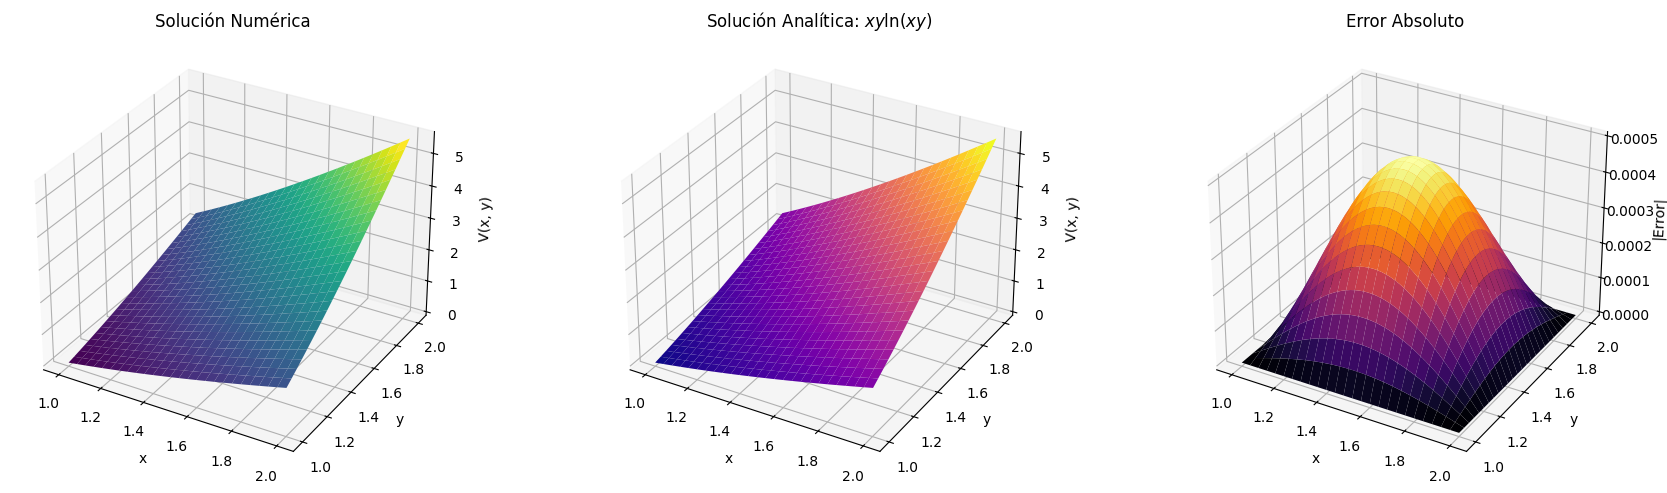

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time  # Para medir tiempo

def initialize_grid(M, N):
    x0, xf = 1.0, 2.0
    y0, yf = 1.0, 2.0
    h = (xf - x0) / M
    k = (yf - y0) / N
    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)
    V = np.zeros_like(X)

    # Condiciones de frontera
    V[0, :]  = y * np.log(y)
    V[:, 0]  = x * np.log(x)
    V[-1, :] = 2 * y * np.log(2 * y)
    V[:, -1] = x * np.log(4 * x**2)

    return X, Y, V, h, k

def source_term(X, Y):
    f = X / Y + Y / X
    f[0, :] = 0
    f[-1, :] = 0
    f[:, 0] = 0
    f[:, -1] = 0
    return f

def solve_poisson(V, source, M, N, h, k, tol=1e-6):
    delta = 1.0
    iteraciones = 0
    start_time = time.time()  # Inicia el cronómetro

    while delta > tol:
        V_old = V.copy()
        for i in range(1, M):
            for j in range(1, N):
                V[i, j] = (
                    (V_old[i+1, j] + V_old[i-1, j]) * k**2 +
                    (V_old[i, j+1] + V_old[i, j-1]) * h**2 -
                    source[i, j] * h**2 * k**2
                ) / (2 * (h**2 + k**2))
        delta = np.max(np.abs(V - V_old))
        iteraciones += 1

    end_time = time.time()  # Detiene el cronómetro
    tiempo = end_time - start_time
    print(f"Tiempo de cálculo: {tiempo:.4f} segundos. Iteraciones: {iteraciones}")
    return V, tiempo

# Parámetros
M = N = 50
X, Y, V, h, k = initialize_grid(M, N)
source = source_term(X, Y)

# Solución numérica con tiempo
V_numerica, tiempo_total = solve_poisson(V, source, M, N, h, k)

# Solución analítica
V_analitica = X * Y * np.log(X * Y)

# Error absoluto
error = np.abs(V_numerica - V_analitica)

# Gráfica 1: Solución numérica
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, V_numerica, cmap='viridis')
ax1.set_title("Solución Numérica")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("V(x, y)")

# Gráfica 2: Solución analítica
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, V_analitica, cmap='plasma')
ax2.set_title("Solución Analítica: $xy\\ln(xy)$")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("V(x, y)")

# Gráfica 3: Error absoluto
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, error, cmap='inferno')
ax3.set_title("Error Absoluto")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("|Error|")

plt.tight_layout()
plt.show()


Iteraciones hasta convergencia: 4
Tiempo total de ejecución: 0.0182 segundos
Tiempo de resolución numérica: 0.0168 segundos
Error relativo máximo: 1.0000e+00
RMSE: 1.3040e+00


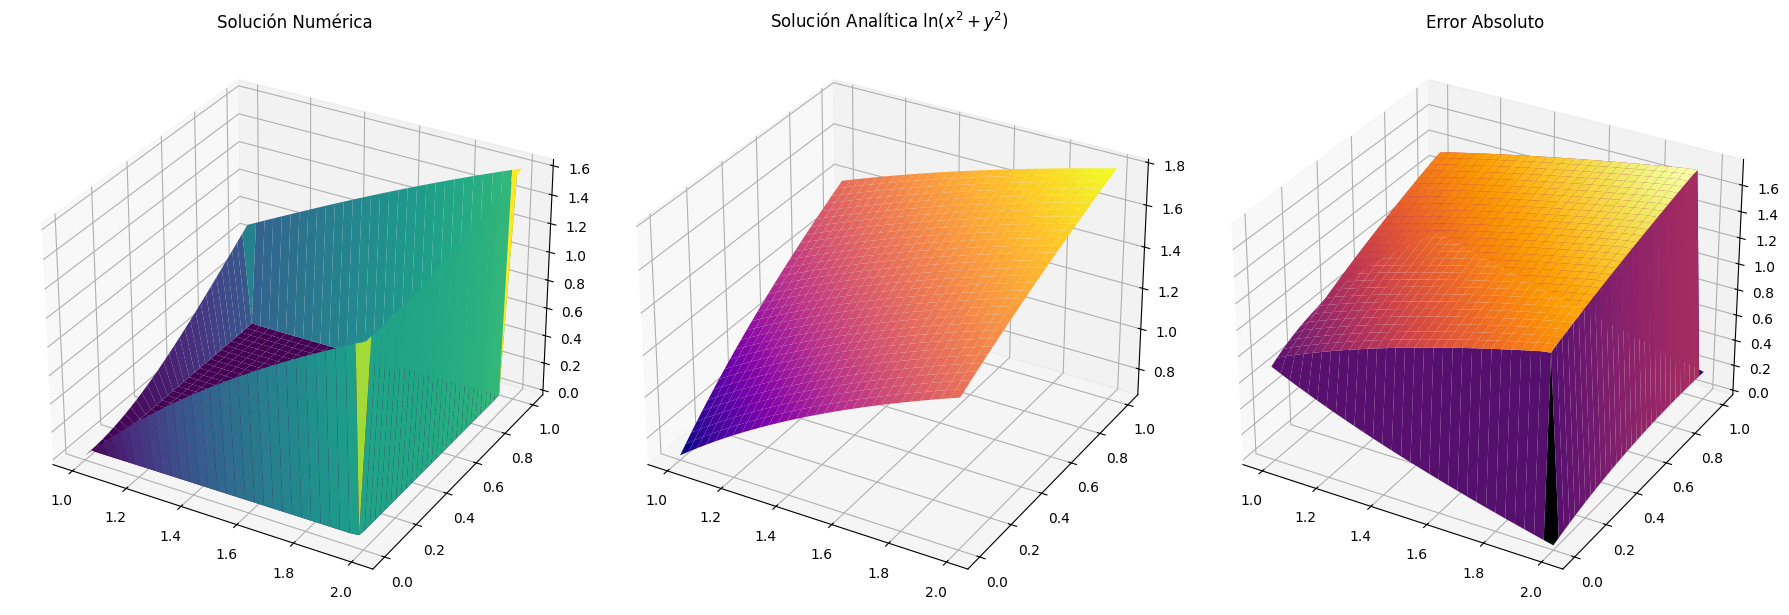

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

def initialize_grid(M, N, x0=1.0, xf=2.0, y0=0.0, yf=1.0):
    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)
    h = (xf - x0) / M
    k = (yf - y0) / N

    V = np.zeros_like(X)
    V_new = np.zeros_like(X)
    source = np.zeros_like(X)  # fuente = 0 para ecuación de Laplace


    V[:, 0]  = np.log(Y[:, 0]**2 + 1)
    V[:, -1] = np.log(Y[:, -1]**2 + 4)
    V[0, :]  = 2 * np.log(X[0, :])
    V[-1, :] = np.log(X[-1, :]**2 + 1)
    return X, Y, V, V_new, source, h, k

def solve_poisson(V, source, M, N, h, k, tol=1e-8):
    delta = 1.0
    iterations = 0
    while delta > tol:
        S1 = []
        for i in range(1, M):
            for j in range(1, N):
                V_new = (
                    ((V[i + 1, j] + V[i - 1, j]) * k**2) +
                    ((V[i, j + 1] + V[i, j - 1]) * h**2) -
                    (source[i, j] * h*2 * k*2)
                ) / (2 * (h*2 + k*2))

                S1.append(abs(V_new - V[i, j]))
                V[i, j] = V_new

        delta = max(S1)
        iterations += 1

    print(f"Iteraciones hasta convergencia: {iterations}")
    return V

def plot_comparison(X, Y, V_num, V_exact):
    fig = plt.figure(figsize=(18, 6))

    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, Y, V_num, cmap='viridis')
    ax1.set_title('Solución Numérica')

    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, Y, V_exact, cmap='plasma')
    ax2.set_title('Solución Analítica $\\ln(x^2 + y^2)$')

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X, Y, np.abs(V_exact - V_num), cmap='inferno')
    ax3.set_title('Error Absoluto')

    plt.tight_layout()
    plt.show()

# ========= EJECUCIÓN =========
start_time = time.time()

# Parámetros
M, N = 30, 30
X, Y, V, _, _, h, k = initialize_grid(M, N)

# Término fuente (cero para Laplace)
source = np.zeros_like(X)

# Resolver
solve_start = time.time()
V_sol = solve_poisson(V, source, M, N, h, k)
solve_end = time.time()

# Solución analítica
V_exact = np.log(X*2 + Y*2)

# Errores
error_absoluto = np.abs(V_exact - V_sol)
error_relativo = np.max(error_absoluto / (np.abs(V_exact) + 1e-16))

rmse = np.sqrt(np.mean(error_absoluto**2))

# Tiempos y errores
end_time = time.time()
print(f"Tiempo total de ejecución: {end_time - start_time:.4f} segundos")
print(f"Tiempo de resolución numérica: {solve_end - solve_start:.4f} segundos")
print(f"Error relativo máximo: {error_relativo:.4e}")
print(f"RMSE: {rmse:.4e}")

# Gráfica
plot_comparison(X, Y, V_sol, V_exact)